In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Questions
How does the road surface condition impact accident severity, considering other factors?
This question aims to explore the relationship between road surface conditions and accident severity while taking into account other relevant factors. By analyzing the "Road_Surface_Conditions" column, which contains categorical data, we can examine different road surface conditions such as dry, wet, icy, or snowy. To answer this question, we can use statistical methods such as logistic regression or chi-square tests to assess the association between road surface conditions and accident severity. Additionally, we can perform a multivariate analysis by including other variables like weather conditions, speed limit, or road type to better understand the impact of road surface conditions on accident severity while controlling for confounding variables.

Can we predict the number of casualties in an accident based on various factors using machine learning?
This question involves developing a predictive model to estimate the number of casualties in an accident using machine learning techniques. By treating the "Number_of_Casualties" column as the target variable and utilizing the other columns as features, we can apply regression algorithms such as linear regression, decision trees, or neural networks. To answer this question, we need to preprocess the data, handle missing values, encode categorical variables, and perform feature engineering if necessary. The model can then be trained and evaluated using appropriate metrics such as mean absolute error or root mean squared error. This analysis can provide insights into the factors that contribute to higher casualty counts and help in developing strategies for accident prevention and response.

Can we predict the likelihood of a fatal accident occurring at a specific location using machine learning?
This question involves building a predictive model to determine the likelihood of a fatal accident at a given location. By treating the "Accident_Severity" column as the target variable and utilizing spatial data such as longitude, latitude, and location details, we can employ techniques like spatial regression or geostatistical models. This analysis can help identify high-risk areas and provide insights for targeted interventions and safety measures. To answer this question, we need to preprocess the data, consider spatial dependencies, incorporate relevant spatial covariates (e.g., population density, road density), and select appropriate modeling approaches. The model's performance can be evaluated using metrics such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

In [3]:
accident2005 = pd.read_csv("data/accidents_2005_to_2007.csv", low_memory=False)
accident2009 = pd.read_csv("data/accidents_2009_to_2011.csv", low_memory=False)
accident2012 = pd.read_csv("data/accidents_2012_to_2014.csv", low_memory=False)

## The data
The data was found [here](https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales). (https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales)

In [4]:
df = pd.concat([accident2005, accident2009, accident2012], axis=0)

In [5]:
df.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005


In [6]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

# Question 1
How does the road surface condition impact accident severity, considering other factors? This question aims to explore the relationship between road surface conditions and accident severity while taking into account other relevant factors. By analyzing the "Road_Surface_Conditions" column, which contains categorical data, we can examine different road surface conditions such as dry, wet, icy, or snowy. To answer this question, we can use statistical methods such as logistic regression or chi-square tests to assess the association between road surface conditions and accident severity. Additionally, we can perform a multivariate analysis by including other variables like weather conditions, speed limit, or road type to better understand the impact of road surface conditions on accident severity while controlling for confounding variables.


## Notes
To answer the question, the important columns to note in this case would be the number of vehicles involved, the accident severity and the road surface conditions. The initial outlook, would be to see firstly how many accidents happened per road surface condition. Secondly, to see if there were more vehicles depending on condition. Thirdly, to find out if there's a correlation between road surface condition and accident severity.

In [7]:
q1_accident = df

<ipython-input-8-e1be5b375d0a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  q1_accident.hist(ax = ax);


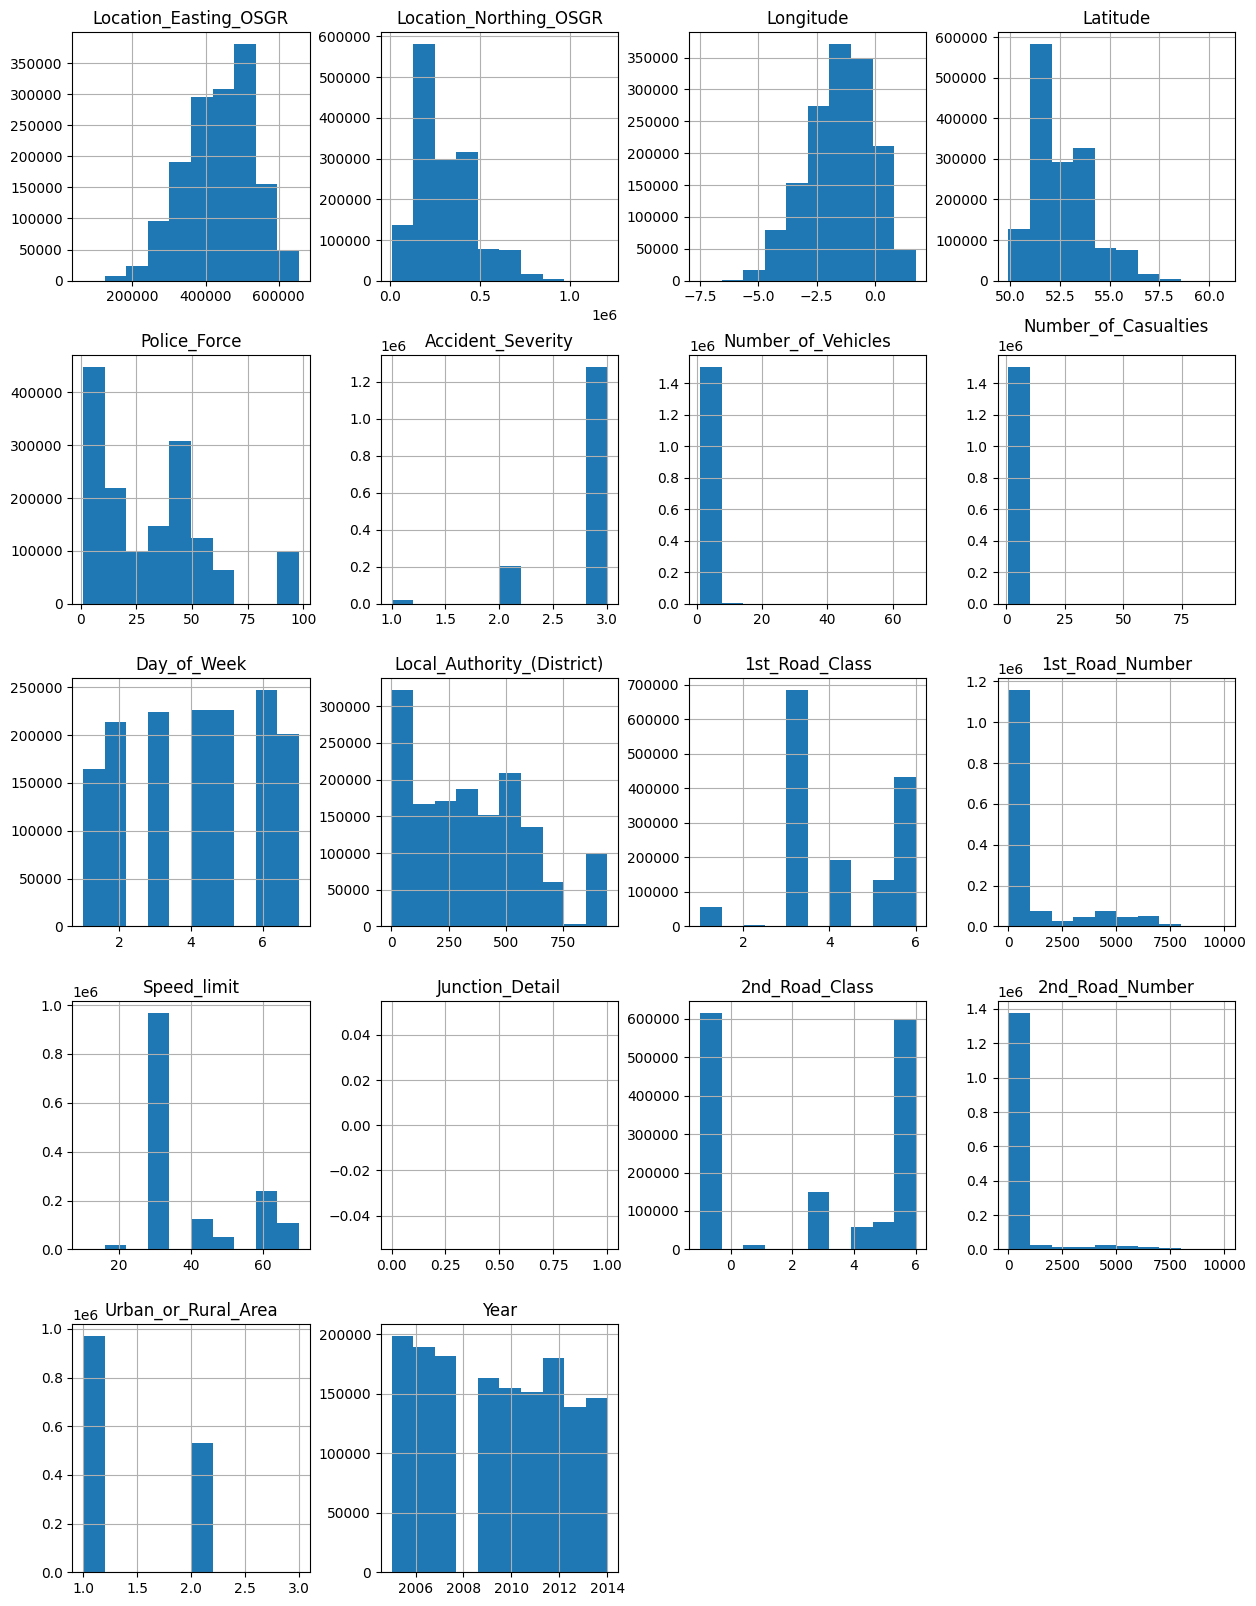

In [8]:
#plotting a histgram to quickly visualise the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
q1_accident.hist(ax = ax);

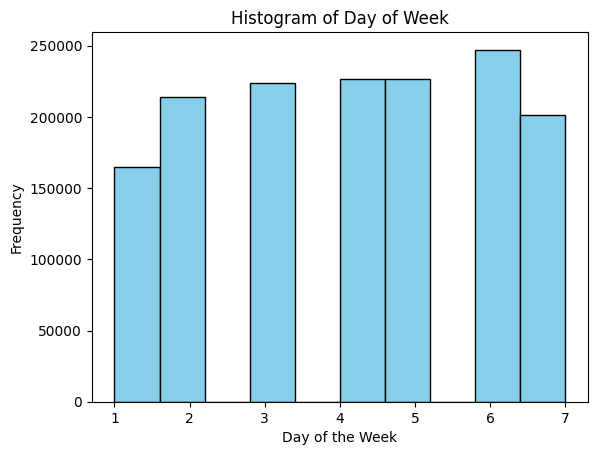

In [9]:
plt.hist(q1_accident['Day_of_Week'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of Day of Week')

# Show the plot
plt.show()

From this, we can see that the most amount of accidents happened on a Saturday.

In [10]:
grouped_data = df.groupby(['Longitude', 'Latitude']).size().reset_index(name='count')
sorted_data = grouped_data.sort_values(by='count', ascending=False)
most_frequent_pair = sorted_data.iloc[0]
most_frequent_longitude = most_frequent_pair['Longitude']
most_frequent_latitude = most_frequent_pair['Latitude']
most_frequent_count = most_frequent_pair['count']


In [11]:
print(f"Latitude: {most_frequent_latitude}, Longitude: {most_frequent_longitude}")

Latitude: 52.949719, Longitude: -0.977611


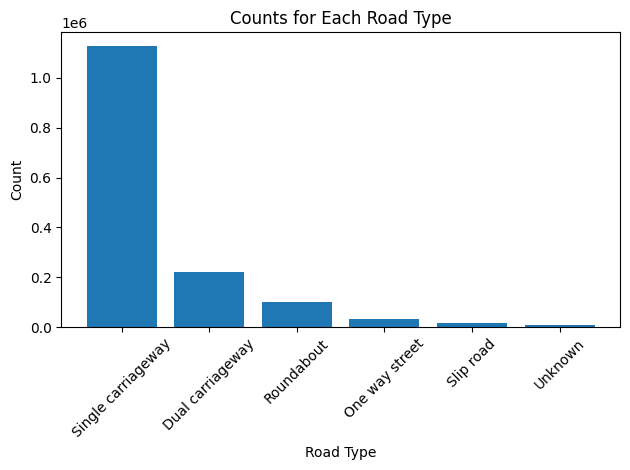

In [12]:
road_type_counts = q1_accident['Road_Type'].value_counts()
plt.bar(road_type_counts.index, road_type_counts.values)
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.title('Counts for Each Road Type')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
q1_accident['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

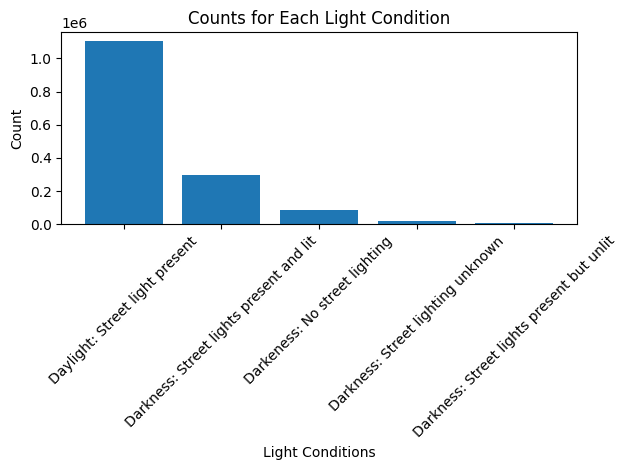

In [14]:
light_conditions_counts = q1_accident['Light_Conditions'].value_counts()
plt.bar(light_conditions_counts.index, light_conditions_counts.values)
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.title('Counts for Each Light Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this we can see that Daylight: Street light present is the most frequent. Which implies that light levels had only a nominal effect on accident frequency.

# Theory
From the current exploration, it is assumed that one major factor of a an accident happening is due to overconfidence when driving. From seeing that the most accidents happened in Daylight, on a Saturday, and on Single Carriageways. These are considered the "least dangerous conditions" to drive, and as such they would be assumed to be the least amount of accidents. I will now explore the weather condition, to see if this overconfidence persists.

In [15]:
q1_accident = q1_accident[['Number_of_Vehicles', 'Accident_Severity', 'Road_Surface_Conditions']]

In [16]:
unique_strings = q1_accident['Road_Surface_Conditions'].unique()
print(unique_strings)

['Wet/Damp' 'Dry' 'Frost/Ice' 'Snow' 'Flood (Over 3cm of water)' nan]


In [17]:
total_len = len(q1_accident)

In [18]:
value_count = q1_accident['Road_Surface_Conditions'].value_counts(dropna=True)
value_counts = value_count
print(value_counts)

Dry                          1034670
Wet/Damp                      423477
Frost/Ice                      31405
Snow                           10497
Flood (Over 3cm of water)       2143
Name: Road_Surface_Conditions, dtype: int64


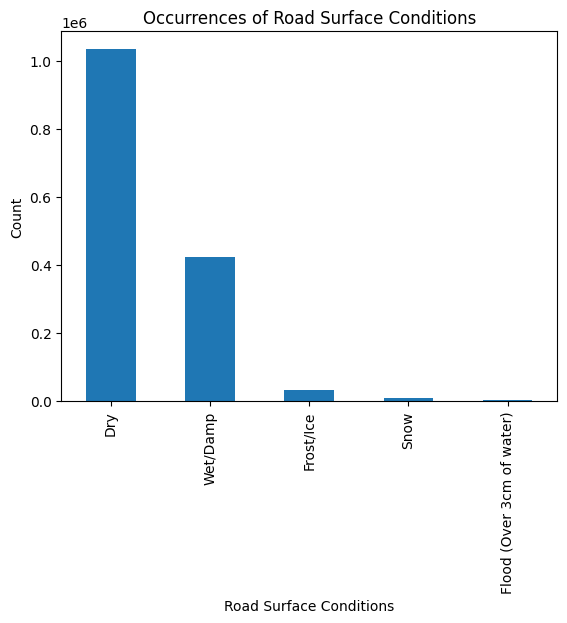

In [19]:
value_counts.plot(kind='bar')

plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.title('Occurrences of Road Surface Conditions')

plt.show()

In [20]:
percentages = {'Dry': 0, 'Wet/Damp': 0, 'Frost/Ice': 0, 'Snow': 0, 'Flood (Over 3cm of water)': 0}
for value, count in value_count.items():
  percentages[value] = (count / total_len) * 100

print(percentages)

{'Dry': 68.78768739819832, 'Wet/Damp': 28.153907522521028, 'Frost/Ice': 2.087890170528205, 'Snow': 0.6978692284679054, 'Flood (Over 3cm of water)': 0.14247249277000298}


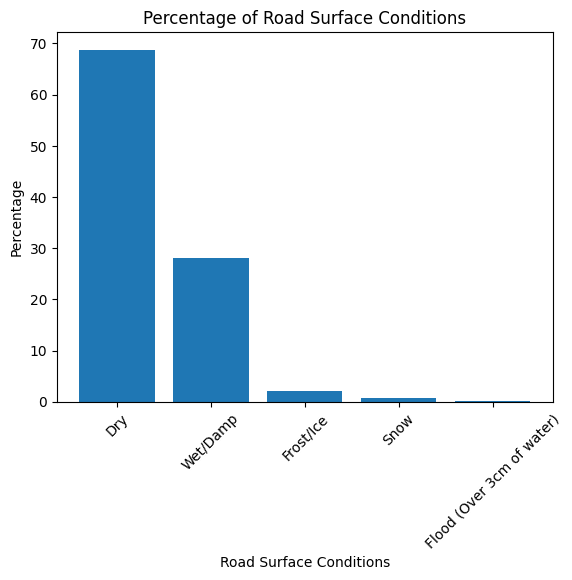

In [21]:

plt.bar(percentages.keys(), percentages.values())

plt.xlabel('Road Surface Conditions')
plt.ylabel('Percentage')
plt.title('Percentage of Road Surface Conditions')

plt.xticks(rotation=45)


plt.show()

From this, we can see as a percentage, most the accidents were in Dry weather, which again is considered the "best" driving condition. This further affirms my theory of overconfidence when driving.

In [22]:
severity_road = q1_accident[['Accident_Severity','Road_Surface_Conditions']]
severity_road.head(3)

,Accident_Severity,Road_Surface_Conditions
0,2,Wet/Damp
1,3,Dry
2,3,Dry


In [23]:
unique_values = severity_road['Accident_Severity'].unique()
print(unique_values)

[2 3 1]


It is assumed that the severity increases, with 1 being the lowest severity, and 3 being the highest severity.

In [24]:
grouped = severity_road.groupby('Accident_Severity')['Road_Surface_Conditions'].value_counts()
print(grouped)

Accident_Severity  Road_Surface_Conditions  
1                  Dry                           13032
                   Wet/Damp                       5956
                   Frost/Ice                       326
                   Snow                             74
                   Flood (Over 3cm of water)        41
2                  Dry                          143700
                   Wet/Damp                      55664
                   Frost/Ice                      3618
                   Snow                           1033
                   Flood (Over 3cm of water)       288
3                  Dry                          877938
                   Wet/Damp                     361857
                   Frost/Ice                     27461
                   Snow                           9390
                   Flood (Over 3cm of water)      1814
Name: Road_Surface_Conditions, dtype: int64


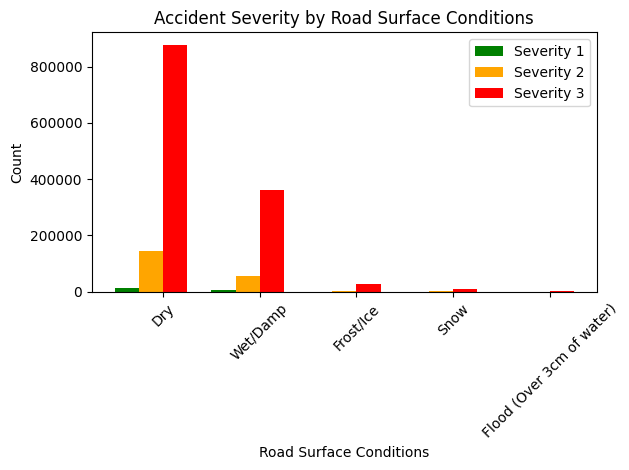

In [25]:

# Create a dictionary to store the colors for each severity level
severity_colors = {
    1: 'green',
    2: 'orange',
    3: 'red'
}

# Define the order of severity levels and road surface conditions
severity_order = [1, 2, 3]
road_conditions_order = ['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood (Over 3cm of water)']

# Set the width of each bar
bar_width = 0.25

# Create the bar chart
fig, ax = plt.subplots()

# Iterate over each severity level
for severity in severity_order:
    # Get the data for the current severity level
    data = grouped[severity].reindex(road_conditions_order)

    # Create the x-coordinates for the bars
    x = np.arange(len(road_conditions_order)) + (severity - 1) * bar_width

    # Create the bars for the current severity level
    ax.bar(x, data, width=bar_width, label=f'Severity {severity}', color=severity_colors[severity])

# Set the x-axis labels and tick labels
ax.set_xlabel('Road Surface Conditions')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(road_conditions_order)) + bar_width * 1.5)
ax.set_xticklabels(road_conditions_order, rotation=45)

# Add a legend
ax.legend()

# Set the title
ax.set_title('Accident Severity by Road Surface Conditions')

# Display the chart
plt.tight_layout()
plt.show()

From this graph, we can see that Accident severity was highest when the road condition was dry, we will now check this against Speed_Limit, and the Junction_Control, to further investigate if there was anything that can be done to mitigate this.

In [26]:
mitigation = df[['Junction_Control','Speed_limit', 'Accident_Severity']]

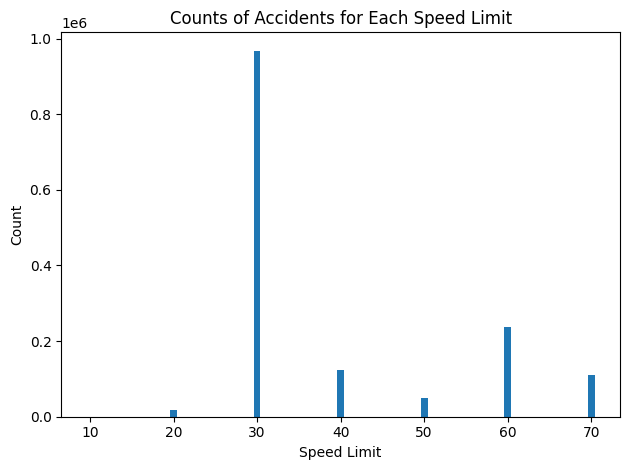

In [27]:
speed_limit_counts = mitigation['Speed_limit'].value_counts()
plt.bar(speed_limit_counts.index, speed_limit_counts.values)
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.title('Counts of Accidents for Each Speed Limit')

plt.tight_layout()
plt.show()

The reason for a large majority of accidents occuring at a lower speed (30), is due to the lack of flow when driving at these speeds. As seen earlier, most accidents occured on single carriageway roads, and now most frequently at 30 MPH. In context, this could be due to constant accelerating and decceleration of vehicles, creating an unpredictable driving environment.

The first assumption to mitigate the accident occurences would be to reduce speeds, however we now see this has the opposite effect. Reducing overconfidence when driving is the main problem. This can only be solved by educating drivers, which already exists, with signs on school buses to mind the children, or even billboards reminding drivers of this in high traffic areas.

## Question 2

Can we predict the number of casualties in an accident based on various factors using machine learning? This question involves developing a predictive model to estimate the number of casualties in an accident using machine learning techniques. By treating the "Number_of_Casualties" column as the target variable and utilizing the other columns as features, we can apply regression algorithms such as linear regression, decision trees, or neural networks. To answer this question, we need to preprocess the data, handle missing values, encode categorical variables, and perform feature engineering if necessary. The model can then be trained and evaluated using appropriate metrics such as mean absolute error or root mean squared error. This analysis can provide insights into the factors that contribute to higher casualty counts and help in developing strategies for accident prevention and response.

Urban or Rural area, Rural is 1.

In [ ]:
question_2 = pd.concat([accident2005, accident2009, accident2012], axis=0)

In [ ]:
len(question_2)

1504150

In [ ]:
question_2['Speed_limit'].unique()

array([30, 40, 50, 20, 60, 70, 10, 15])

In [ ]:
question_2.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

To predict the Number_of_Casualties, our features will be:
- Accident_Severity - It can be assumed that the higher the severity, the more casualties.
- Number_of_Vehicles - More vehicles involved in the collision would equal more people involved in the accident, at a minimum of 1 per vehicle.
- Date - This can effect the amount of cars on the road, whether it is a holiday, or something similar.
- Day_of_Week - This can give insight as to how many cars are on the road, Monday - Friday should be busier, whilst Saturday/Sunday should be quieter, this in tandem with the Date and Time, can paint an obvious heat map of accidents, and should allow for easy correlations to be spotted.
- Time - This can give an insight into rush hour accidents, and as stated above, can be used in tandem with Date and Day_of_Week, to paint a full picture.
- Road_Type - The road type can be "'Single carriageway', 'Dual carriageway', 'One way street',
'Roundabout', 'Slip road', 'Unknown'". This can give an insight as to which roads have the most amount of accidents, and if that has an effect on the Number_of_Casualties.
- Speed_limit - The higher the speed limit, the more opportunity for an accident due to decreased reaction time.
- Junction_Control - This gives an indication as to if having traffic lights effects the opportunity for an accident.
- Light_Conditions - This plays a huge role in dictating whether an accident can happen or not, lower light conditions mean lower visibility, higher risk.
- Weather_Conditions - This can increase risk but will also reduce the frequency of crashes. As was found in Q1, the worse the weather, the fewer the accidents, likely due to people driving more carefully.
- Road_Surface_Conditions - These will play the same role as the Weather_Conditions, however, in some cases, the weather can be dry, and the road still wet from rain recently, so can effect the chance of haivng an accident.
- Urban_or_Rural_Area - This will give an insight into; The condition of the road maintenance wise
(Urban areas tend to have better maintained roads), the mindset of the driver (Rural inhabitants are less likely to be in a rush), how many people would be driving at the same time (More people in an Urban area, therefore more chance for accidents).
- Year - This can be used to give a frame of reference for road conditions on a year by year scale, even population of areas based on the year.

Using all these features, we will be able to find correlations, and should be able to predict the Number_of_Casualties using a machine learning model trained on the data with these features. Our first step is to clean the data.

In [ ]:
question_2 = question_2[['Number_of_Casualties','Accident_Severity', 'Number_of_Vehicles', 'Date', 'Day_of_Week', 'Time', 'Road_Type', 'Speed_limit', 'Junction_Control', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Year']]
question_2 = question_2.dropna()

In [ ]:
# Convert the 'Date' column to datetime type
question_2['Date'] = pd.to_datetime(question_2['Date'])

# Extract the time component from the 'Time' column
time_component = pd.to_timedelta(question_2['Time'] + ':00')

# Merge the 'Date' and 'Time' components into a single datetime column
question_2['DateTime'] = question_2['Date'] + time_component

question_2['DateTime'] = (question_2['DateTime'] - pd.Timestamp('2005-01-01')).apply(lambda x: x.total_seconds())
question_2['DateTime'] = question_2['DateTime'].astype('Int64')

<ipython-input-28-ad4d6266170b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  question_2['Date'] = pd.to_datetime(question_2['Date'])


In [ ]:
question_2.drop('Date', axis=1, inplace=True)
question_2.drop('Time', axis=1, inplace=True)

In [ ]:
question_2.dtypes

Number_of_Casualties        int64
Accident_Severity           int64
Number_of_Vehicles          int64
Day_of_Week                 int64
Road_Type                  object
Speed_limit                 int64
Junction_Control           object
Weather_Conditions         object
Road_Surface_Conditions    object
Urban_or_Rural_Area         int64
Year                        int64
DateTime                    Int64
dtype: object

In [ ]:
road_type_mapping = {
    'Single carriageway': 0,
    'Dual carriageway': 1,
    'One way street': 2,
    'Roundabout': 3,
    'Slip road': 4,
    'Unknown': 5
}
question_2['Road_Type'] = question_2['Road_Type'].map(road_type_mapping)

In [ ]:
junction_control_mapping = {'Automatic traffic signal': 0, 'Giveway or uncontrolled': 1, 'Stop Sign': 2,
       'Authorised person': 3}
question_2['Junction_Control'] = question_2['Junction_Control'].map(junction_control_mapping).astype('Int64')


In [ ]:
weather_conditions_mapping = {'Raining without high winds': 0, 'Fine without high winds': 1, 'Unknown': 2,
       'Snowing without high winds': 3, 'Other': 4, 'Fine with high winds': 5,
       'Raining with high winds': 6, 'Fog or mist': 7,
       'Snowing with high winds': 8}
question_2['Weather_Conditions'] = question_2['Weather_Conditions'].map(weather_conditions_mapping).astype('Int64')

In [ ]:
road_surface_conditions_mapping = {'Dry':0, 'Wet/Damp':1, 'Frost/Ice':2, 'Snow':3,
       'Flood (Over 3cm of water)':4}

question_2['Road_Surface_Conditions'] = question_2['Road_Surface_Conditions'].map(road_surface_conditions_mapping).astype('Int64')

In [ ]:
question_2.dtypes

Number_of_Casualties       int64
Accident_Severity          int64
Number_of_Vehicles         int64
Day_of_Week                int64
Road_Type                  int64
Speed_limit                int64
Junction_Control           Int64
Weather_Conditions         Int64
Road_Surface_Conditions    Int64
Urban_or_Rural_Area        int64
Year                       int64
DateTime                   Int64
dtype: object

Now that all the dtypes are Int64, we can start testing and training machine learning models.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Prepare the data
X = question_2[['Accident_Severity', 'Number_of_Vehicles',
       'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Control',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Year', 'DateTime']].values
y = question_2['Number_of_Casualties'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict using the trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.47487652278001885
RMSE: 0.7393732051083436


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train MAE:", mae_train)
print("Train RMSE:", rmse_train)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)

Train MAE: 0.008194884643838949
Train RMSE: 0.08570056055740523
Test MAE: 0.4960105777190126
Test RMSE: 1.0190656088558858


The huge difference between the Train RMSE and Test RMSE suggests that there could be an overfitting issue with the decision tree method. Therefore, we will move on to the next method.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train MAE:", mae_train)
print("Train RMSE:", rmse_train)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)

Train MAE: 0.1780567515286336
Train RMSE: 0.3185872869606299
Test MAE: 0.4721055991828585
Test RMSE: 0.8264346306375053
